<a href="https://colab.research.google.com/github/HaroonAbdullah2/Emotion-Detection-System-Roman-Urdu/blob/main/Early%20batch%20Baseline%20Machine%20Learning%20Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt



### Logistic Regression

In [ ]:
df = pd.read_excel('/content/Basit dataset  combine batch 3000.xlsx')

In [ ]:
df.head

<bound method NDFrame.head of      Ya mere rab tu bra kreem hy is mulk k halat PR reham frma meray dar ko dur kardy  \
0     ALLAH MUSALMAN PHIR DOR E JAHALAT ME JARAHA H ...                                 
1       Muskurany ki koshish kia karo bnda thk rhta  ha                                 
2                                        Wah bhut khoob                                 
3     right wqt wqt ki baat ha time same ni rhta aj ...                                 
4                                  wah wah kaya bat hai                                 
...                                                 ...                                 
3026  is qom ko shahed aqal ae ke musharaf ne teekh ...                                 
3027                 is randi ko iski aukat dikhai jaye                                 
3028  is saffaak shakhs ne 25 masoom bachon ko qatal...                                 
3029  is sari soortehaal mein pakistan ki awam mazee...                         

In [ ]:
df.tail

<bound method NDFrame.tail of      Ya mere rab tu bra kreem hy is mulk k halat PR reham frma meray dar ko dur kardy  \
0     ALLAH MUSALMAN PHIR DOR E JAHALAT ME JARAHA H ...                                 
1       Muskurany ki koshish kia karo bnda thk rhta  ha                                 
2                                        Wah bhut khoob                                 
3     right wqt wqt ki baat ha time same ni rhta aj ...                                 
4                                  wah wah kaya bat hai                                 
...                                                 ...                                 
3026  is qom ko shahed aqal ae ke musharaf ne teekh ...                                 
3027                 is randi ko iski aukat dikhai jaye                                 
3028  is saffaak shakhs ne 25 masoom bachon ko qatal...                                 
3029  is sari soortehaal mein pakistan ki awam mazee...                         

In [ ]:
df.columns = ["Sentence","Emotion","Intensity" ]

In [ ]:
df.head

<bound method NDFrame.head of                                                Sentence  Emotion Intensity
0     ALLAH MUSALMAN PHIR DOR E JAHALAT ME JARAHA H ...    anger      high
1       Muskurany ki koshish kia karo bnda thk rhta  ha    happy       low
2                                        Wah bhut khoob    happy    medium
3     right wqt wqt ki baat ha time same ni rhta aj ...      sad       low
4                                  wah wah kaya bat hai    happy    medium
...                                                 ...      ...       ...
3026  is qom ko shahed aqal ae ke musharaf ne teekh ...  disgust      high
3027                 is randi ko iski aukat dikhai jaye  disgust    medium
3028  is saffaak shakhs ne 25 masoom bachon ko qatal...    anger    medium
3029  is sari soortehaal mein pakistan ki awam mazee...  disgust    medium
3030  is shamsi tawanai se chalney waley khusrey ko ...  disgust    medium

[3031 rows x 3 columns]>

In [ ]:
df.tail

<bound method NDFrame.tail of                                                Sentence  Emotion Intensity
0     ALLAH MUSALMAN PHIR DOR E JAHALAT ME JARAHA H ...    anger      high
1       Muskurany ki koshish kia karo bnda thk rhta  ha    happy       low
2                                        Wah bhut khoob    happy    medium
3     right wqt wqt ki baat ha time same ni rhta aj ...      sad       low
4                                  wah wah kaya bat hai    happy    medium
...                                                 ...      ...       ...
3026  is qom ko shahed aqal ae ke musharaf ne teekh ...  disgust      high
3027                 is randi ko iski aukat dikhai jaye  disgust    medium
3028  is saffaak shakhs ne 25 masoom bachon ko qatal...    anger    medium
3029  is sari soortehaal mein pakistan ki awam mazee...  disgust    medium
3030  is shamsi tawanai se chalney waley khusrey ko ...  disgust    medium

[3031 rows x 3 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of                                                Sentence  Emotion Intensity
0     ALLAH MUSALMAN PHIR DOR E JAHALAT ME JARAHA H ...    anger      high
1       Muskurany ki koshish kia karo bnda thk rhta  ha    happy       low
2                                        Wah bhut khoob    happy    medium
3     right wqt wqt ki baat ha time same ni rhta aj ...      sad       low
4                                  wah wah kaya bat hai    happy    medium
...                                                 ...      ...       ...
3026  is qom ko shahed aqal ae ke musharaf ne teekh ...  disgust      high
3027                 is randi ko iski aukat dikhai jaye  disgust    medium
3028  is saffaak shakhs ne 25 masoom bachon ko qatal...    anger    medium
3029  is sari soortehaal mein pakistan ki awam mazee...  disgust    medium
3030  is shamsi tawanai se chalney waley khusrey ko ...  disgust    medium

[3031 rows x 3 columns]>

In [ ]:
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
3026    False
3027    False
3028    False
3029    False
3030    False
Length: 3031, dtype: bool


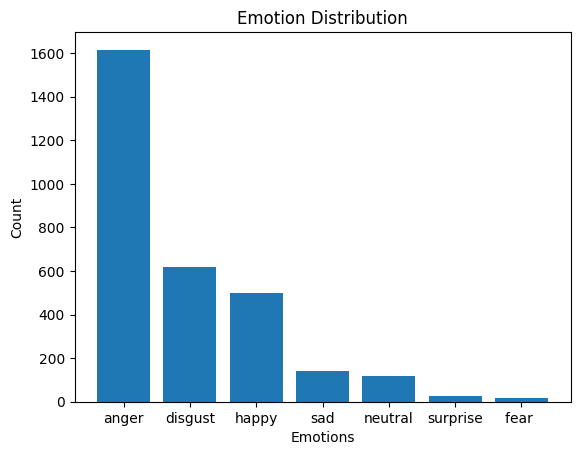

In [ ]:
emotion_counts = df['Emotion'].value_counts()

# Plotting the bar chart
plt.bar(emotion_counts.index, emotion_counts.values)
plt.title('Emotion Distribution')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()


In [ ]:
emotion_counts = df["Emotion"].value_counts()

# Iterate over each emotion
for emotion in emotion_counts.index:
    # Filter the dataframe for the current emotion
    emotion_df = df[df["Emotion"] == emotion]

    # Calculate intensity counts within the current emotion
    intensity_counts = emotion_df["Intensity"].value_counts()

    # Print the emotion count
    print("Emotion:", emotion)
    print("Emotion Count:", emotion_counts[emotion])

    # Print intensity counts within the emotion
    print("Intensity Counts:")
    print(intensity_counts)

    print()  # Print a blank line for readability

Emotion: anger
Emotion Count: 1616
Intensity Counts:
medium    1048
high       353
low        215
Name: Intensity, dtype: int64

Emotion: disgust
Emotion Count: 620
Intensity Counts:
medium    364
low       168
high       88
Name: Intensity, dtype: int64

Emotion: happy
Emotion Count: 497
Intensity Counts:
low       325
medium    136
high       36
Name: Intensity, dtype: int64

Emotion: sad
Emotion Count: 139
Intensity Counts:
medium    78
low       45
high      16
Name: Intensity, dtype: int64

Emotion: neutral
Emotion Count: 119
Intensity Counts:
negation    119
Name: Intensity, dtype: int64

Emotion: surprise
Emotion Count: 24
Intensity Counts:
medium    10
low        9
high       5
Name: Intensity, dtype: int64

Emotion: fear 
Emotion Count: 16
Intensity Counts:
medium    8
low       5
high      3
Name: Intensity, dtype: int64



In [ ]:
df.loc[df["Emotion"] == "fear ", "Emotion"] = "fear"

NameError: ignored

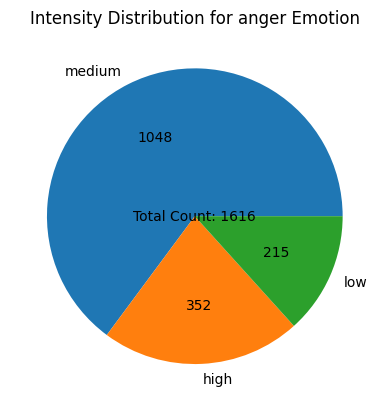

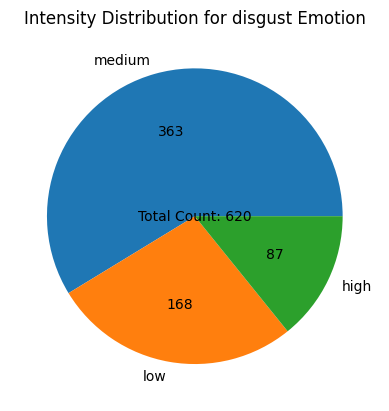

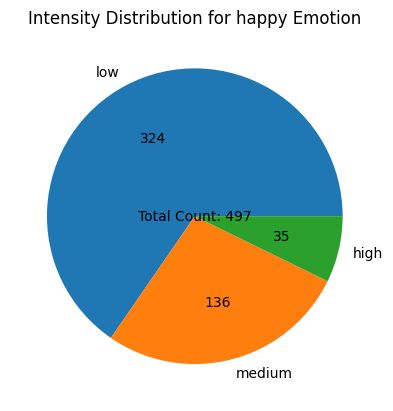

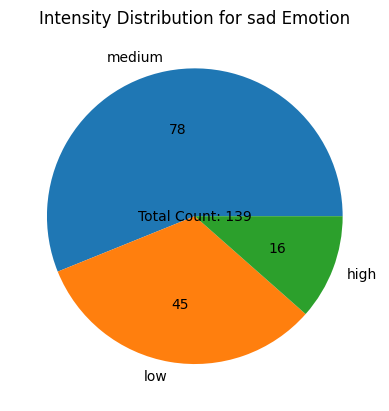

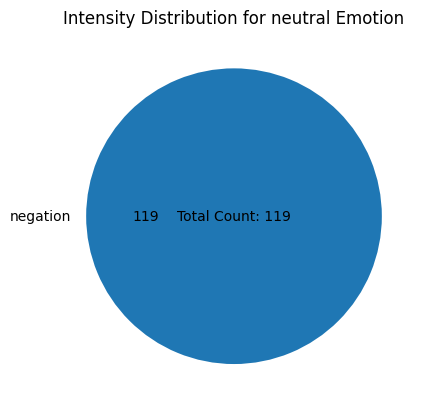

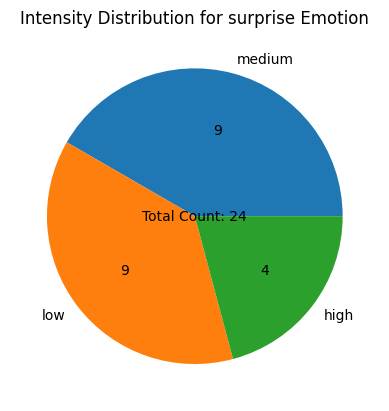

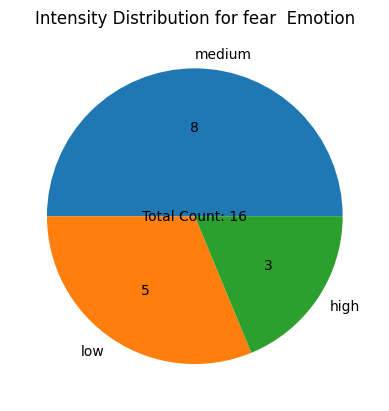

In [ ]:
emotion_counts = df["Emotion"].value_counts()

for emotion in emotion_counts.index:
    # Filter the dataframe for the current emotion
    emotion_df = df[df["Emotion"] == emotion]

    # Calculate intensity counts within the current emotion
    intensity_counts = emotion_df["Intensity"].value_counts()

    # Plot the pie chart for intensity counts
    labels = intensity_counts.index
    counts = intensity_counts.values

    # Plot the pie chart
    plt.figure()
    plt.pie(counts, labels=labels, autopct=lambda p: f'{int(p * sum(counts) / 100)}')
    plt.title(f"Intensity Distribution for {emotion} Emotion")

    # Add total count of the emotion on top of the pie chart
    total_count = emotion_counts[emotion]
    plt.text(0.5, 0.5, f"Total Count: {total_count}", horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes)

    plt.show()

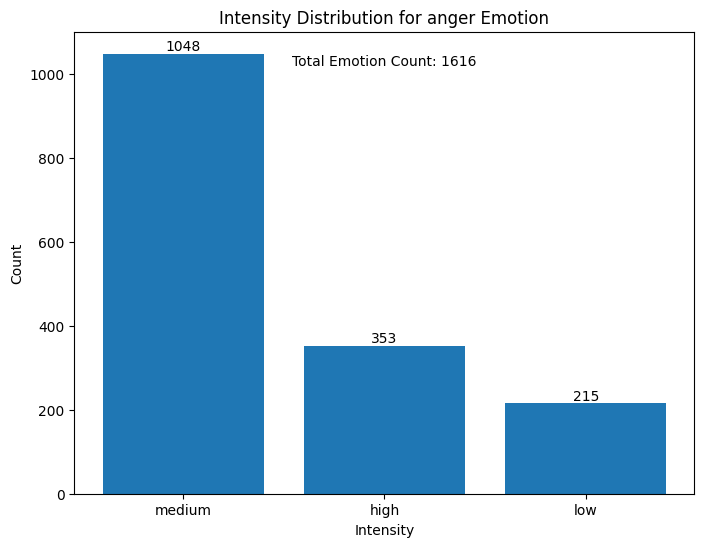

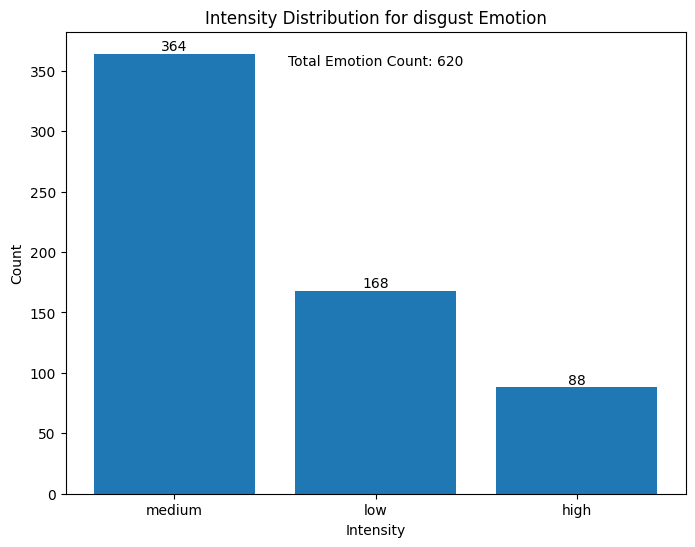

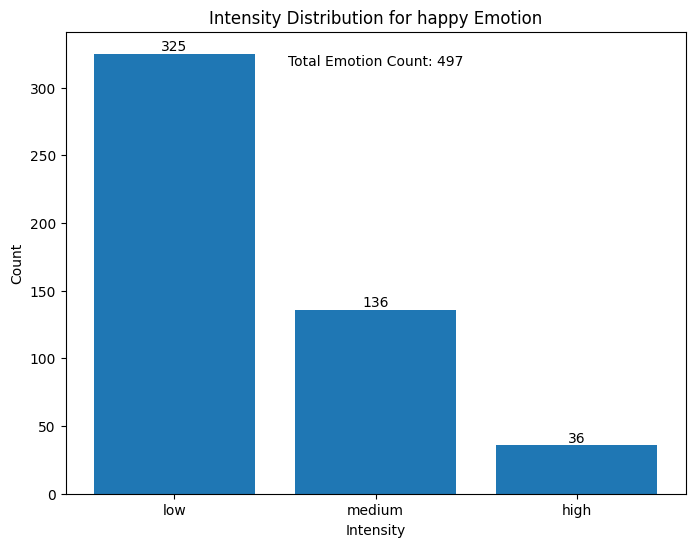

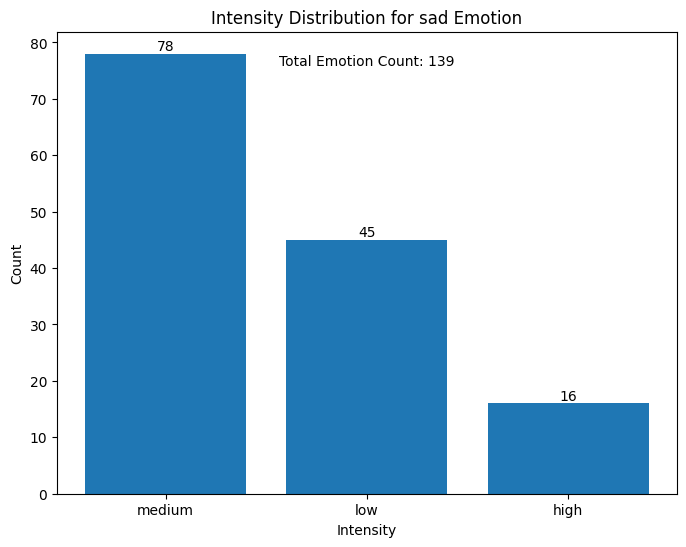

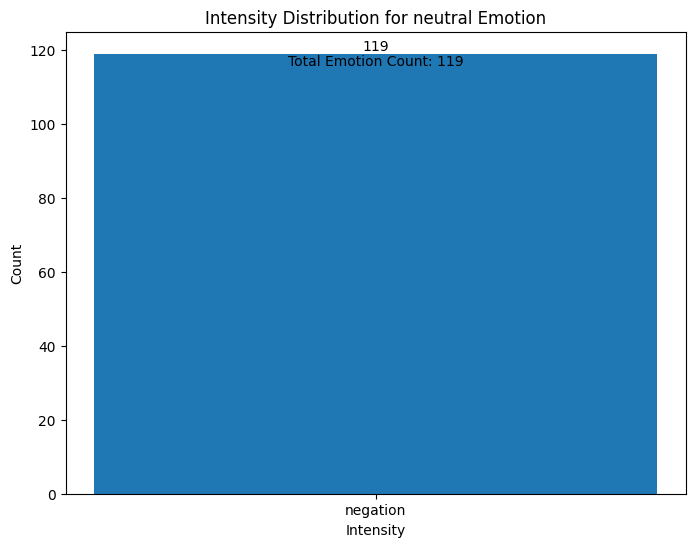

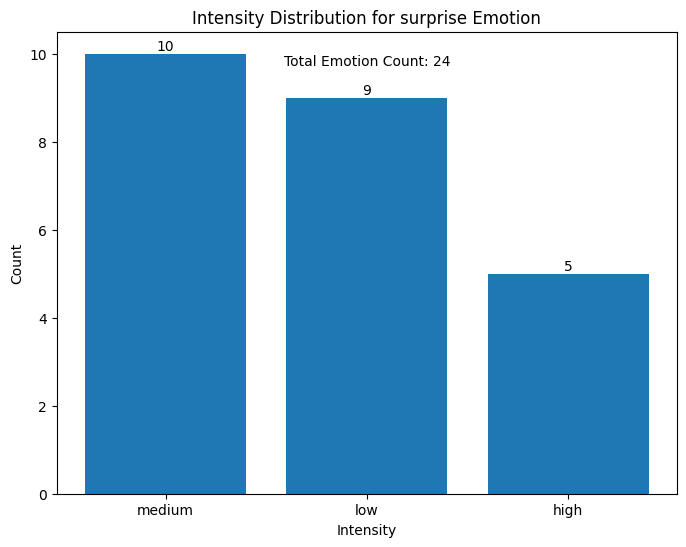

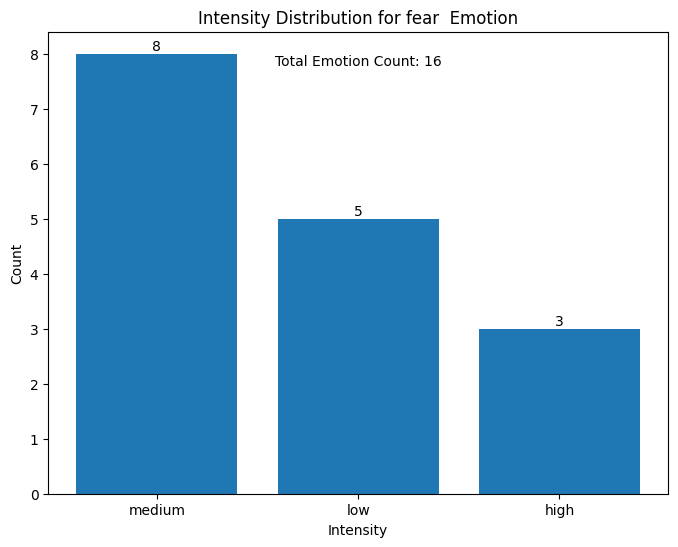

In [ ]:
emotion_counts = df["Emotion"].value_counts()

# Iterate over each emotion
for emotion in emotion_counts.index:
    # Filter the dataframe for the current emotion
    emotion_df = df[df["Emotion"] == emotion]

    # Calculate intensity counts within the current emotion
    intensity_counts = emotion_df["Intensity"].value_counts()

    # Create a bar chart for the current emotion
    plt.figure(figsize=(8, 6))
    plt.bar(intensity_counts.index, intensity_counts.values)
    plt.title(f"Intensity Distribution for {emotion} Emotion")
    plt.xlabel("Intensity")
    plt.ylabel("Count")

    # Add the count values on top of each bar
    for i, count in enumerate(intensity_counts.values):
        plt.text(i, count, str(count), ha='center', va='bottom')

    # Add the total count of the emotion on top of the chart
    plt.text(0.5, 0.95, f"Total Emotion Count: {emotion_counts[emotion]}",
             horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes)

    plt.show()

In [ ]:

stop_words = [
    'mein', 'ne', 'ko', 'ka', 'ki', 'hai', 'hain', 'ho', 'aur',
    'kaafi', 'bohot', 'bahut', 'bilkul', 'bhi', 'ab', 'bhar',
    'kyun', 'ky', 'kya', 'k', 'keh', 'wagera', 'etc', 'etcetera',
    'iss', 'iske', 'uss', 'uske', 'in', 'on', 'is', 'us', 'ke',
    'kay', 'honge', 'hoga', 'hogi', 'houn', 'haye', 'hain', 'hoga'
    # Add more stop words as needed
]

In [ ]:
df['Sentence'] = df['Sentence'].apply(lambda sentence: ' '.join([word for word in sentence.split() if word.lower() not in stop_words]))

In [ ]:
X = df['Sentence']

In [ ]:
y_emotion = df['Emotion']

In [ ]:
y_intensity = df['Intensity']

In [ ]:
X_train, X_test, y_emotion_train, y_emotion_test, y_intensity_train, y_intensity_test = train_test_split(X, y_emotion, y_intensity, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
emotion_model = LogisticRegression()
emotion_model.fit(X_train_vec, y_emotion_train)

LogisticRegression()

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)

In [ ]:
print("Emotion Prediction Accuracy:", emotion_accuracy)

Emotion Prediction Accuracy: 0.6457990115321252


In [ ]:
print(classification_report(y_emotion_test, y_emotion_pred))

              precision    recall  f1-score   support

       anger       0.64      0.99      0.78       324
     disgust       0.53      0.07      0.13       111
        fear       0.00      0.00      0.00         1
       happy       0.89      0.66      0.76       116
     neutral       1.00      0.14      0.24        29
         sad       0.00      0.00      0.00        19
    surprise       0.00      0.00      0.00         7

    accuracy                           0.67       607
   macro avg       0.44      0.27      0.27       607
weighted avg       0.66      0.67      0.59       607



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
intensity_model = LogisticRegression()

In [ ]:
intensity_model.fit(X_train_vec, y_intensity_train)


LogisticRegression()

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_accuracy = accuracy_score(y_intensity_test, y_intensity_pred)

In [ ]:
print("Intensity Prediction Accuracy:", intensity_accuracy)

Intensity Prediction Accuracy: 0.5799011532125206


In [ ]:
print(classification_report(y_intensity_test, y_intensity_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00       111
         low       0.79      0.36      0.50       169
      medium       0.55      0.96      0.70       299
    negation       1.00      0.14      0.25        28

    accuracy                           0.58       607
   macro avg       0.59      0.37      0.36       607
weighted avg       0.54      0.58      0.49       607



## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
X = df['Sentence']

In [ ]:
y_emotion = df['Emotion']

In [ ]:
y_intensity = df['Intensity']

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)

In [ ]:
X_test_vec = vectorizer.transform(X_test)

In [ ]:
emotion_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
emotion_model.fit(X_train_vec, y_emotion_train)

KNeighborsClassifier()

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_report = classification_report(y_emotion_test, y_emotion_pred)
print("Emotion Classification Report:\n", emotion_report)

Emotion Classification Report:
               precision    recall  f1-score   support

       anger       0.68      0.86      0.76       324
     disgust       0.24      0.13      0.17       111
        fear       0.00      0.00      0.00         1
       happy       0.73      0.76      0.75       116
     neutral       0.69      0.31      0.43        29
         sad       0.67      0.21      0.32        19
    surprise       0.00      0.00      0.00         7

    accuracy                           0.65       607
   macro avg       0.43      0.32      0.35       607
weighted avg       0.60      0.65      0.61       607



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
intensity_model = KNeighborsClassifier(n_neighbors=5)


In [ ]:

intensity_model.fit(X_train_vec, y_intensity_train)

KNeighborsClassifier()

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_report = classification_report(y_intensity_test, y_intensity_pred)
print("Intensity Classification Report:\n", intensity_report)

Intensity Classification Report:
               precision    recall  f1-score   support

        high       0.25      0.17      0.20       111
         low       0.51      0.57      0.54       169
      medium       0.56      0.62      0.59       299
    negation       0.70      0.25      0.37        28

    accuracy                           0.51       607
   macro avg       0.51      0.40      0.42       607
weighted avg       0.50      0.51      0.49       607



### **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
emotion_model = SVC(kernel='linear')
emotion_model.fit(X_train_vec, y_emotion_train)

SVC(kernel='linear')

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_report = classification_report(y_emotion_test, y_emotion_pred)
print("Emotion Classification Report:\n", emotion_report)

Emotion Classification Report:
               precision    recall  f1-score   support

       anger       0.67      0.99      0.80       324
     disgust       0.63      0.11      0.18       111
        fear       0.00      0.00      0.00         1
       happy       0.88      0.74      0.80       116
     neutral       0.83      0.17      0.29        29
         sad       0.80      0.21      0.33        19
    surprise       0.00      0.00      0.00         7

    accuracy                           0.70       607
   macro avg       0.54      0.32      0.34       607
weighted avg       0.70      0.70      0.64       607



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
intensity_model = SVC(kernel='linear')
intensity_model.fit(X_train_vec, y_intensity_train)

SVC(kernel='linear')

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_report = classification_report(y_intensity_test, y_intensity_pred)
print("Intensity Classification Report:\n", intensity_report)

Intensity Classification Report:
               precision    recall  f1-score   support

        high       0.25      0.02      0.03       111
         low       0.78      0.35      0.48       169
      medium       0.55      0.95      0.70       299
    negation       0.83      0.18      0.29        28

    accuracy                           0.58       607
   macro avg       0.60      0.37      0.38       607
weighted avg       0.57      0.58      0.50       607



## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [ ]:
emotion_model = MultinomialNB()
emotion_model.fit(X_train_vec, y_emotion_train)

MultinomialNB()

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_report = classification_report(y_emotion_test, y_emotion_pred)
print("Emotion Classification Report:\n", emotion_report)

Emotion Classification Report:
               precision    recall  f1-score   support

       anger       0.60      1.00      0.75       324
     disgust       0.75      0.03      0.05       111
        fear       0.00      0.00      0.00         1
       happy       0.91      0.51      0.65       116
     neutral       0.00      0.00      0.00        29
         sad       0.00      0.00      0.00        19
    surprise       0.00      0.00      0.00         7

    accuracy                           0.64       607
   macro avg       0.32      0.22      0.21       607
weighted avg       0.63      0.64      0.54       607



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
intensity_model = MultinomialNB()
intensity_model.fit(X_train_vec, y_intensity_train)

MultinomialNB()

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_report = classification_report(y_intensity_test, y_intensity_pred)
print("Intensity Classification Report:\n", intensity_report)

Intensity Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00       111
         low       0.84      0.27      0.41       169
      medium       0.53      0.98      0.69       299
    negation       0.00      0.00      0.00        28

    accuracy                           0.56       607
   macro avg       0.34      0.31      0.28       607
weighted avg       0.50      0.56      0.45       607



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Decision** **Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
emotion_model = DecisionTreeClassifier()
emotion_model.fit(X_train_vec, y_emotion_train)

DecisionTreeClassifier()

In [ ]:
y_emotion_pred = emotion_model.predict(X_test_vec)

In [ ]:
emotion_report = classification_report(y_emotion_test, y_emotion_pred)
print("Emotion Classification Report:\n", emotion_report)

Emotion Classification Report:
               precision    recall  f1-score   support

       anger       0.69      0.69      0.69       324
     disgust       0.27      0.27      0.27       111
        fear       0.00      0.00      0.00         1
       happy       0.67      0.71      0.69       116
     neutral       0.35      0.24      0.29        29
         sad       0.24      0.32      0.27        19
    surprise       0.50      0.14      0.22         7

    accuracy                           0.58       607
   macro avg       0.39      0.34      0.35       607
weighted avg       0.57      0.58      0.57       607



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
intensity_model = DecisionTreeClassifier()
intensity_model.fit(X_train_vec, y_intensity_train)

DecisionTreeClassifier()

In [ ]:
y_intensity_pred = intensity_model.predict(X_test_vec)

In [ ]:
intensity_report = classification_report(y_intensity_test, y_intensity_pred)
print("Intensity Classification Report:\n", intensity_report)

Intensity Classification Report:
               precision    recall  f1-score   support

        high       0.20      0.15      0.18       111
         low       0.42      0.40      0.41       169
      medium       0.51      0.59      0.54       299
    negation       0.38      0.21      0.27        28

    accuracy                           0.44       607
   macro avg       0.38      0.34      0.35       607
weighted avg       0.42      0.44      0.43       607



# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop(['Emotion', 'Intensity'], axis=1)  # Replace 'Emotion' and 'Intensity' with the appropriate column names
y_emotion = df['Emotion']
y_intensity = df['Intensity']


In [ ]:
X_train, X_test, y_emotion_train, y_emotion_test, y_intensity_train, y_intensity_test = \
    train_test_split(X, y_emotion, y_intensity, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier()
}


In [ ]:
highest_emotion_accuracy = 0
highest_intensity_accuracy = 0
best_emotion_model = ''
best_intensity_model = ''
for model_name, model in models.items():

    model.fit(X_train_vec, y_emotion_train)
    y_emotion_pred = model.predict(X_test_vec)
    emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
    print(f'{model_name} Emotion Accuracy: {emotion_accuracy}')


    model.fit(X_train_vec, y_intensity_train)
    y_intensity_pred = model.predict(X_test_vec)
    intensity_accuracy = accuracy_score(y_intensity_test, y_intensity_pred)
    print(f'{model_name} Intensity Accuracy: {intensity_accuracy}')


    if emotion_accuracy > highest_emotion_accuracy:
        highest_emotion_accuracy = emotion_accuracy
        best_emotion_model = model_name


    if intensity_accuracy > highest_intensity_accuracy:
        highest_intensity_accuracy = intensity_accuracy
        best_intensity_model = model_name


print(f'\nEmotion Model with highest accuracy: {best_emotion_model} ({highest_emotion_accuracy})')
print(f'Intensity Model with highest accuracy: {best_intensity_model} ({highest_intensity_accuracy})')

Logistic Regression Emotion Accuracy: 0.6738056013179572
Logistic Regression Intensity Accuracy: 0.5782537067545305
K-Nearest Neighbors Emotion Accuracy: 0.6441515650741351
K-Nearest Neighbors Intensity Accuracy: 0.4975288303130148
Support Vector Machine Emotion Accuracy: 0.6721581548599671
Support Vector Machine Intensity Accuracy: 0.5815485996705108
Naive Bayes Emotion Accuracy: 0.6359143327841845
Naive Bayes Intensity Accuracy: 0.556836902800659
Decision Tree Emotion Accuracy: 0.6029654036243822
Decision Tree Intensity Accuracy: 0.443163097199341

Emotion Model with highest accuracy: Logistic Regression (0.6738056013179572)
Intensity Model with highest accuracy: Support Vector Machine (0.5815485996705108)


In [ ]:
highest_emotion_accuracy = 0
highest_intensity_accuracy = 0
best_emotion_model = ''
best_intensity_model = ''
for model_name, model in models.items():

    model.fit(X_train_vec, y_emotion_train)
    y_emotion_pred = model.predict(X_test_vec)
    emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
    print(f'{model_name} Emotion Accuracy: {emotion_accuracy}')


    model.fit(X_train_vec, y_intensity_train)
    y_intensity_pred = model.predict(X_test_vec)
    intensity_accuracy = accuracy_score(y_intensity_test, y_intensity_pred)
    print(f'{model_name} Intensity Accuracy: {intensity_accuracy}')


    if emotion_accuracy > highest_emotion_accuracy:
        highest_emotion_accuracy = emotion_accuracy
        best_emotion_model = model_name


    if intensity_accuracy > highest_intensity_accuracy:
        highest_intensity_accuracy = intensity_accuracy
        best_intensity_model = model_name


print(f'\nEmotion Model with highest accuracy: {best_emotion_model} ({highest_emotion_accuracy})')
print(f'Intensity Model with highest accuracy: {best_intensity_model} ({highest_intensity_accuracy})')

Logistic Regression Emotion Accuracy: 0.6738056013179572
Logistic Regression Intensity Accuracy: 0.5799011532125206
K-Nearest Neighbors Emotion Accuracy: 0.6441515650741351
K-Nearest Neighbors Intensity Accuracy: 0.5024711696869851
Support Vector Machine Emotion Accuracy: 0.6721581548599671
Support Vector Machine Intensity Accuracy: 0.5848434925864909
Naive Bayes Emotion Accuracy: 0.6359143327841845
Naive Bayes Intensity Accuracy: 0.5601317957166392
Decision Tree Emotion Accuracy: 0.5815485996705108
Decision Tree Intensity Accuracy: 0.44810543657331137

Emotion Model with highest accuracy: Logistic Regression (0.6738056013179572)
Intensity Model with highest accuracy: Support Vector Machine (0.5848434925864909)


In [ ]:
print(emotion_counts)

anger       1616
disgust      620
happy        497
sad          139
neutral      119
surprise      24
fear          17
Name: Emotion, dtype: int64
